In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import random
import numpy as np
import math
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
google_data = pd.read_csv('google-finance2017_2.csv')

/opt/conda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
a = [[],[],[],[],[],[],[],[],[],[],[],[],[]]
Max_in = []
Min_in = []
Max_target = 0
Min_target = 0

SMA = google_data['simple 10-day moving average'].tolist()
WMA = google_data['weighted 10-day moving average'].tolist()
M = google_data['momentum'].tolist()
K = google_data['%K'].tolist()
D = google_data['%D'].tolist()
C1 = google_data['close of yesterday'].tolist()
C2 = google_data['close of two days before'].tolist()
C3 = google_data['close of three days before'].tolist()
C4 = google_data['close of four days before'].tolist()
C5 = google_data['close of five days before'].tolist()

google = [SMA,WMA,M,K,D,C1,C2,C3,C4,C5]
google_input = np.transpose(google)
print(google_data['Close'])
output_array = google_data['Close'][0:1605].tolist()
print(output_array[1604])
training_inputs = google_input[0:1203]
testing_inputs = google_input[1203:1605]
training_outputs = output_array[0:1203]
testing_outputs = output_array[1203:1605]

#(training_inputs,
# testing_inputs,
# training_classes,
# testing_classes) = train_test_split(google_input, output_array, train_size=0.5, random_state=5)

#scalerX = StandardScaler().fit(training_inputs)
#norm_training_inputs = scalerX.transform(training_inputs)
#norm_testing_inputs = scalerX.transform(testing_inputs)
#scalerout = StandardScaler().fit(training_outputs)
#norm_training_outputs = scalerout.transform(training_outputs)
#norm_testing_outputs = scalerout.transform(testing_outputs)

norm_training_inputs = np.array(training_inputs)
norm_testing_inputs = np.array(testing_inputs)
norm_training_outputs = np.array(training_outputs)
norm_testing_outputs = np.array(testing_outputs)

a = np.array(training_inputs).T

for i in range(0,len(a)):
    Max_in.append(max(a[i]))
    Min_in.append(min(a[i]))
Max_outputs = max(training_outputs)
Min_outputs = min(training_outputs)

for i in range(0,len(training_outputs)):
    norm_training_outputs[i] = (norm_training_outputs[i] - np.array(Min_outputs))/(np.array(Max_outputs)-np.array(Min_outputs))
for i in range(0,len(testing_outputs)):
    norm_testing_outputs[i] = (norm_testing_outputs[i] - np.array(Min_outputs))/(np.array(Max_outputs)-np.array(Min_outputs))
for i in range(0,len(training_inputs)):
    norm_training_inputs[i] = (norm_training_inputs[i] - np.array(Min_in))/(np.array(Max_in)-np.array(Min_in))
for i in range(0,len(testing_inputs)):
    norm_testing_inputs[i] = (norm_testing_inputs[i] - np.array(Min_in))/(np.array(Max_in)-np.array(Min_in))

0       624.180013
1       639.630002
2       631.750011
3       626.770011
4       611.830009
5       611.080028
6       619.909995
7       616.500017
8       616.790010
9       600.990030
10      600.359984
11      611.040029
12      612.000005
13      610.149989
14      610.980030
15      614.290010
16      618.380032
17      616.500017
18      616.440019
19      624.500005
20      628.150038
21      624.150014
22      624.220012
23      625.259986
24      630.079991
25      610.209988
26      611.320022
27      608.820022
28      610.039992
29      613.400032
           ...    
1575    841.650024
1576    843.190002
1577    862.760010
1578    872.299988
1579    871.729980
1580    874.250000
1581    905.960022
1582    912.570007
1583    916.440002
1584    927.039978
1585    931.659973
1586    927.130005
1587    934.299988
1588    932.169983
1589    928.780029
1590    930.599976
1591    932.219971
1592    937.080017
1593    943.000000
1594    919.619995
1595    930.239990
1596    934.

In [47]:
def sigmoid(net):
    return 1 / (1 + math.exp(-net))

def backPropagation(input_array, output_array, weight, Y, rate):
    
    deltao = init_node_value([1])
    deltah = init_node_value([50])
    

    for i in range(0,len(Y[len(Y)-1])):
        deltao[0][i] = Y[len(Y)-1][i] * (1 - Y[len(Y)-1][i]) * (output_array - Y[len(Y)-1][i])

    for i in range(0,len(Y[len(Y)-2])):
        for n in range(0,len(weight[len(weight)-1][i])):
            deltah[len(deltah)-1][i] += Y[len(Y)-2][i] * (1 - Y[len(Y)-2][i]) * weight[len(weight)-1][i][n] * deltao[0][n]

    for h in range(len(Y)-3, -1, -1):
        for i in range(0,len(Y[h])):
            for n in range(0, len(weight[h+1][i])):
                #print h,i,n
                #print deltah[h][i], Y[h][i], weight[h+1][i][n], deltah[h+1][n]
                deltah[h][i] += Y[h][i] * (1 - Y[h][i]) * weight[h+1][i][n] * deltah[h+1][n]
                
    for i in range(0,len(weight)):
        for h in range(0,len(weight[i])):
            for n in range(0,len(weight[i][h])):
                if i == 0:
                    weight[i][h][n] += rate * deltah[i][n] * input_array[h]
                elif i == (len(weight) - 1):
                    #print i
                    weight[i][h][n] += rate * deltao[0][n] * Y[i-1][h]
                else:
                    weight[i][h][n] += rate * deltah[i][n] * Y[i-1][h]
    
     
    return weight
def weight_matrix(nodes,r):
    weight_matrix = []
    if len(nodes) == 2:
        for ii in range(0,nodes[0]):
            weight_matrix.append([])
            for ll in range(0,nodes[1]):
                if r == True:
                    weight_matrix[ii].append(random.uniform(0.1,0.5))
                elif r == False:
                    weight_matrix[ii].append(0)
    else:
        for ll in range(0,len(nodes)-1):
            weight_matrix.append([])
            for ii in range(0,nodes[ll]):
                weight_matrix[ll].append([])
                for nn in range(0,nodes[ll+1]):
                    if r == True:
                        weight_matrix[ll][ii].append(random.uniform(0.1,0.5))
                    elif r == False:
                        weight_matrix[ll][ii].append(0)
    return weight_matrix

def init_node_value(nodes):
    value = []
        
    for n in range(0,len(nodes)):
        value.append([])
        for i in range(0,nodes[n]):
            value[n].append(0)
    return value


# Set Parameters
(1) weight_matrix([nodes of every layer], random values = True or False)
(2) init_node_value([nodes value of every hidden and end])

In [48]:
#5 hidden
net = init_node_value([50,1])
#print(net)
Y = init_node_value([50,1])
weight = weight_matrix([10,50,1],True)
print(weight)
deltao = init_node_value([1])
deltah = init_node_value([50])
rate = 0.5
#print deltah

#deltah = init_node_value(1,5)
#deltao = init_node_value(1,3)
#rate = 0.1    #compare 0.1 and 0.01
#result = init_node_value(1,4)

[[[0.4742266518923497, 0.204780221077205, 0.22992515163268343, 0.21306347355713817, 0.4835320265072438, 0.14844197926977853, 0.19021500049370071, 0.1821795692041142, 0.17156491367211085, 0.12762763025190924, 0.27203331664706254, 0.15118803723261004, 0.46319150913182716, 0.1368101709162168, 0.20092229511091753, 0.4309126158731367, 0.39095042989156803, 0.30275159037180077, 0.2510567423324273, 0.18721206836477716, 0.4087414821490042, 0.2793138962125513, 0.35598956771796564, 0.22803087569841113, 0.16694998568408692, 0.2560341690305967, 0.3236384128255798, 0.29090628526983453, 0.22423874562403154, 0.1969394436722746, 0.3565843070447653, 0.13126095812295296, 0.10282968487442568, 0.29136920864514215, 0.35727521161378806, 0.4689205234088053, 0.12384654688719095, 0.11164665467452767, 0.43521183085861337, 0.4025164625914659, 0.3852307114039083, 0.22988672854975906, 0.25861286983822906, 0.15248894315186662, 0.2228065120419137, 0.20783944501890728, 0.28751973532058217, 0.24833597601672205, 0.47032

# Learning

training RMSE :  (0.0130044065658+0j)
It cost 2035.134554 sec


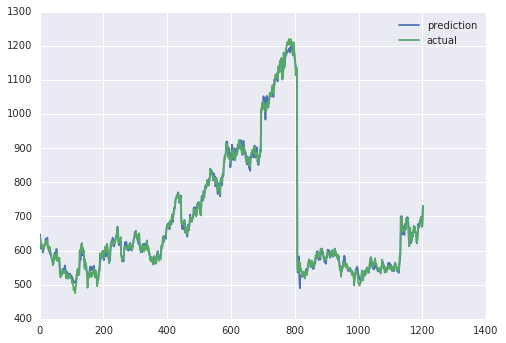

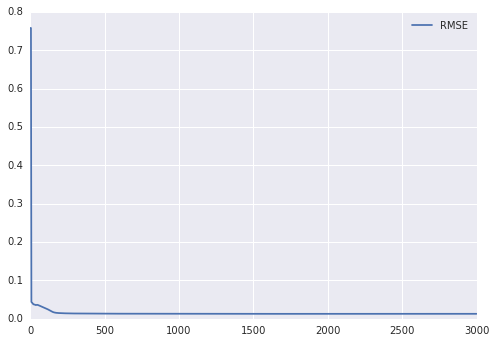

In [49]:
import cmath
import time
iteration = 3000
RMSE = [0,0,0]
RMSEtest = 0
RMSEtestplot = []
R = []
tStart = time.time()
index = 0
training_Yo = []
for t in range(iteration):
    for inputs in range(0, len(training_inputs)):
        
        net = init_node_value([50,1])
        Y = init_node_value([50,1])
        
        for n in range(0,len(net[0])):
            for i in range(0,len(norm_training_inputs[inputs])):
                #print n, i
                net[0][n] += norm_training_inputs[inputs][i] * weight[0][i][n]
            Y[0][n] = sigmoid(net[0][n])
            
        for w in range(1,len(weight)):
            for n in range(0, len(net[w])):
                for i in range(0,len(weight[w])):
                    #print net[w][n]
                    net[w][n] += Y[w-1][i]*weight[w][i][n]
                    
                Y[w][n] = sigmoid(net[w][n])
                
            if w == len(weight)-1:
                if t == (iteration - 1):
                    training_Yo.append(Y[w][n])
                #print Y[w][n]
     
        RMSEtest += pow(Y[len(Y)-1][0]-norm_training_outputs[inputs],2)
        
        weight = backPropagation(norm_training_inputs[inputs], norm_training_outputs[inputs], weight, Y, rate)   
        #print Y[0]

        
    RMSEtest = cmath.sqrt(RMSEtest/len(norm_training_outputs))    

    if t >= (iteration - 1):

        print "training RMSE : ",RMSEtest
        #print Y[len(Y)-1]

    RMSEtestplot.append(RMSEtest)

    RMSEtest = 0
tEnd = time.time()        
print "It cost %f sec" % (tEnd - tStart)
        
prediction = np.array(training_Yo) * (np.array(Max_outputs)-np.array(Min_outputs)) + np.array(Min_outputs)


plt.plot(prediction,label="prediction")#blue
plt.plot(training_outputs,label = "actual")
plt.legend()
plt.show() 

plt.plot(RMSEtestplot,label="RMSE")#blue
plt.legend()
plt.show()

# Recalling

testing RMSE :  (0.0830388684153+0j)
% Error :  6.70802787333


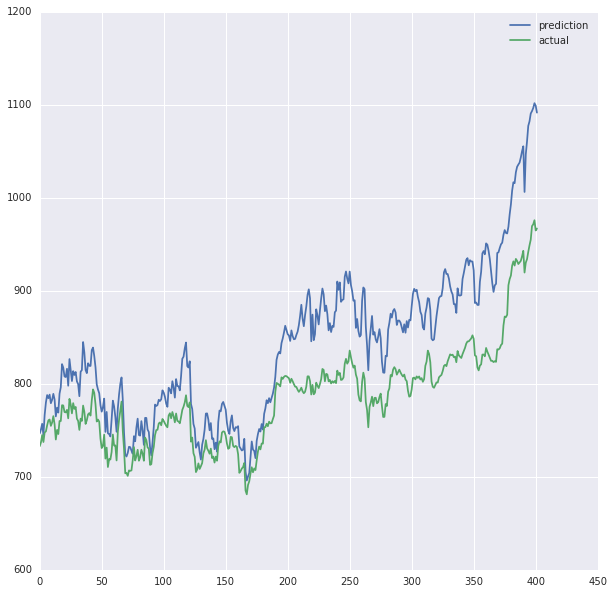

In [50]:
i = 0
testing_Yo = []
error = 0
error_rate = 0
correct_rate = 0
error_count = []
count = 0

plt.figure(figsize=(10, 10))

for test_data in norm_testing_inputs:
    net = init_node_value([50,1])
    Y = init_node_value([50,1])
    
    for n in range(0,len(net[0])):
        for i in range(0,len(test_data)):
            net[0][n] += test_data[i] * weight[0][i][n]
        Y[0][n] = sigmoid(net[0][n])

    for w in range(1,len(weight)):
        for n in range(0, len(net[w])):
            for i in range(0,len(weight[w])):
                #print net[w][n]
                net[w][n] += Y[w-1][i]*weight[w][i][n]

            Y[w][n] = sigmoid(net[w][n])
            
        if w == len(weight)-1:
            testing_Yo.append(Y[w][n])
            #print Y[w][n]
            
    #error += (abs(Y[len(Y)-1][0]-norm_testing_outputs[count])/norm_testing_outputs[count])*100         
    RMSEtest += pow(Y[len(Y)-1][0]-norm_testing_outputs[count],2)
    count += 1
    
RMSEtest = cmath.sqrt(RMSEtest/len(norm_testing_outputs))
#error_rate = error/count
print "testing RMSE : ", RMSEtest

prediction = np.array(testing_Yo) * (np.array(Max_outputs)-np.array(Min_outputs)) + np.array(Min_outputs)
error = (abs(testing_outputs - prediction) / testing_outputs)*100

for i in range(0,len(error)):
    error_rate += error[i]
error_rate = error_rate/(len(error))

print "% Error : ", error_rate

plt.plot(prediction,label="prediction")#blue
plt.plot(testing_outputs,label = "actual")

plt.legend()
plt.show()


In [90]:
print weight

[[[0.17623049101311583, 0.19997258728629921, 0.7718488244794911, 0.316574241141309, 0.066624589229998255, -0.051450934932362566, 0.38132365545886537, -0.35861939784762253, -0.80900860358950577, 0.36876663855733788], [0.60322721019533632, 0.8093554921512639, -0.013857774701629216, 0.19036686374128031, 0.42874988623317478, -0.55751401023925029, 0.35686943909897967, -0.41923653325183646, -1.5069586345986792, 0.61257295223770836], [0.45107595459916733, 0.40924932162071548, -2.0625793330970943, 0.64398188734843764, 0.56544687875973831, -1.082541951137294, 0.34797048204939074, -0.17038552331077153, 1.0840012349136179, 0.41575265657942795], [0.23807560246266843, -0.1738053227810189, -0.083957692863052366, 0.092488938064916454, 0.083049296120139185, 0.085966009390358866, 0.094312519117671106, -0.17571825626621262, -0.084266921852701071, -0.05953150479064729], [-0.070824964593196302, 0.25229809563465666, -1.1921520626499835, 0.36481687958266085, 0.44551676049993921, -0.33262265896190896, 0.2676

In [83]:
for i in error_count:
    print testing_Yo[i]

In [31]:
print google_data[['Close', 'simple 10-day moving average', 'weighted 10-day moving average', 'momentum', '%K', '%D', 'close of yesterday', 'close of two days before', 'close of three days before', 
                  'close of four days before', 'close of five days before']].corr()
                  

                                   Close  simple 10-day moving average  \
Close                           1.000000                      0.982697   
simple 10-day moving average    0.982697                      1.000000   
weighted 10-day moving average  0.990234                      0.998307   
momentum                        0.183163                      0.017435   
%K                              0.204946                      0.100560   
%D                              0.294676                      0.229359   
close of yesterday              0.994198                      0.987671   
close of two days before        0.987989                      0.991350   
close of three days before      0.981889                      0.993764   
close of four days before       0.976015                      0.994921   
close of five days before       0.970441                      0.994910   

                                weighted 10-day moving average  momentum  \
Close                              